<a href="https://colab.research.google.com/github/AndVisa/Alquileres/blob/main/Robot_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.- Configuración del Ambiente

In [ ]:
global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import time
import seaborn as sns

In [ ]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Numpy | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'}
print('------')
!pip install yfinance

Python 3.11.12
------
Name: pandas
Version: 2.2.2
------
Name: numpy
Version: 2.0.2
Name: lapack-lite
Name: dragon4
Name: libdivide
Name: Meson
Name: spin
Name: OpenBLAS
Name: LAPACK
Name: GCC runtime library
Version 3.1, 31 March 2009
                       Version 3, 29 June 2007
  5. Conveying Modified Source Versions.
  14. Revised Versions of this License.
Name: libquadmath
------
Name: matplotlib
------


#2.- Obtención de Datos

##2.1 Precio Histórico del Bitcoin

In [ ]:
import pandas as pd
import yfinance as yf
import time

In [ ]:
def importar_base_bitcoin():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

In [ ]:
btc_symbol = yf.Ticker("BTC-USD")

In [ ]:
interval_time = "5m"
Time_period = "7d"

In [ ]:
df_bitcoin = pd.DataFrame((btc_symbol.history)(period=Time_period,interval=interval_time))

In [ ]:
importar_base_bitcoin()
df_bitcoin.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-05-13 00:00:00+00:00,102809.585938,102809.585938,102702.218750,102702.218750,0,0.0,0.0
2025-05-13 00:05:00+00:00,102652.632812,102675.687500,102644.656250,102661.046875,0,0.0,0.0
2025-05-13 00:10:00+00:00,102601.882812,102620.335938,102566.609375,102566.609375,0,0.0,0.0
2025-05-13 00:15:00+00:00,102598.023438,102635.257812,102524.851562,102635.257812,658403328,0.0,0.0
2025-05-13 00:20:00+00:00,102595.609375,102595.609375,102521.437500,102551.257812,0,0.0,0.0


##2.2 Indicadores de Tendencia


In [ ]:
def extraer_tendencias():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}

In [ ]:
url = "https://www.coinmarketcap.com/"

In [ ]:
respuesta = requests.get(url, headers=headers)

In [ ]:
s=BeautifulSoup(respuesta.content, features="lxml")

In [ ]:
respuesta = s.find_all('p', {'class':'sc-65e7f566-0 byYAWx coin-item-symbol'})

indice=0
for item in respuesta:
  if item.getText()=='BTC':
    break
  indice+=1

respuesta = s.find_all('div', {'class':['sc-142c02c-0 lmjbLF fall', 'sc-142c02c-0 lmjbLF', 'sc-142c02c-0 lmjbLF rise']})
precio_actual = float(respuesta[indice].getText().replace('$','').replace(',',''))

lista = []
respuesta = s.find_all('span', {'class':['sc-1e8091e1-0 fDGzbr','sc-1e8091e1-0 jgYsZM']})
for item in respuesta[::3]:
  lista.append(item)

print(lista [0])
tendencia= ''
if lista[indice].find('span')['class'][0] == 'icon-Caret-down':
    tendencia= 'Bear'
else:
    tendencia= 'Bull'




<span class="sc-1e8091e1-0 fDGzbr"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>0.35%</span>


In [ ]:
extraer_tendencias()
print('Bitcoin Price: ', precio_actual)
print('Tendencia: ', tendencia)

Bitcoin Price:  105272.12
Tendencia:  Bull


#3.- Limpieza de Datos

In [ ]:
def limpieza_datos():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

In [ ]:
df_bitcoin_limpio = df_bitcoin.copy()
df_bitcoin_limpio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1941 entries, 2025-05-13 00:00:00+00:00 to 2025-05-19 17:45:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1941 non-null   float64
 1   High          1941 non-null   float64
 2   Low           1941 non-null   float64
 3   Close         1941 non-null   float64
 4   Volume        1941 non-null   int64  
 5   Dividends     1941 non-null   float64
 6   Stock Splits  1941 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 121.3 KB


In [ ]:
df_bitcoin_limpio

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-05-13 00:00:00+00:00,102809.585938,102809.585938,102702.218750,102702.218750,0,0.0,0.0
2025-05-13 00:05:00+00:00,102652.632812,102675.687500,102644.656250,102661.046875,0,0.0,0.0
2025-05-13 00:10:00+00:00,102601.882812,102620.335938,102566.609375,102566.609375,0,0.0,0.0
2025-05-13 00:15:00+00:00,102598.023438,102635.257812,102524.851562,102635.257812,658403328,0.0,0.0
2025-05-13 00:20:00+00:00,102595.609375,102595.609375,102521.437500,102551.257812,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-19 17:25:00+00:00,105300.031250,105331.281250,105300.031250,105331.281250,1918136320,0.0,0.0
2025-05-19 17:30:00+00:00,105207.859375,105207.859375,105106.640625,105106.640625,441131008,0.0,0.0
2025-05-19 17:35:00+00:00,105146.414062,105248.625000,105146.414062,105248.625000,902950912,0.0,0.0


In [ ]:
df_bitcoin_limpio.Volume

,Volume
Datetime,
2025-05-13 00:00:00+00:00,0
2025-05-13 00:05:00+00:00,0
2025-05-13 00:10:00+00:00,0
2025-05-13 00:15:00+00:00,658403328
2025-05-13 00:20:00+00:00,0
...,...
2025-05-19 17:25:00+00:00,1918136320
2025-05-19 17:30:00+00:00,441131008
2025-05-19 17:35:00+00:00,902950912


In [ ]:
df_bitcoin_limpio.Close

,Close
Datetime,
2025-05-13 00:00:00+00:00,102702.218750
2025-05-13 00:05:00+00:00,102661.046875
2025-05-13 00:10:00+00:00,102566.609375
2025-05-13 00:15:00+00:00,102635.257812
2025-05-13 00:20:00+00:00,102551.257812
...,...
2025-05-19 17:25:00+00:00,105331.281250
2025-05-19 17:30:00+00:00,105106.640625
2025-05-19 17:35:00+00:00,105248.625000


In [ ]:
df_bitcoin_limpio.index

DatetimeIndex(['2025-05-13 00:00:00+00:00', '2025-05-13 00:05:00+00:00',
               '2025-05-13 00:10:00+00:00', '2025-05-13 00:15:00+00:00',
               '2025-05-13 00:20:00+00:00', '2025-05-13 00:25:00+00:00',
               '2025-05-13 00:30:00+00:00', '2025-05-13 00:35:00+00:00',
               '2025-05-13 00:40:00+00:00', '2025-05-13 00:45:00+00:00',
               ...
               '2025-05-19 17:00:00+00:00', '2025-05-19 17:05:00+00:00',
               '2025-05-19 17:10:00+00:00', '2025-05-19 17:15:00+00:00',
               '2025-05-19 17:20:00+00:00', '2025-05-19 17:25:00+00:00',
               '2025-05-19 17:30:00+00:00', '2025-05-19 17:35:00+00:00',
               '2025-05-19 17:40:00+00:00', '2025-05-19 17:45:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Datetime', length=1941, freq=None)

In [ ]:
df_bitcoin_limpio.shape

(1941, 7)

In [ ]:
df_bitcoin_limpio = df_bitcoin_limpio.drop_duplicates()
df_bitcoin_limpio

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-05-13 00:00:00+00:00,102809.585938,102809.585938,102702.218750,102702.218750,0,0.0,0.0
2025-05-13 00:05:00+00:00,102652.632812,102675.687500,102644.656250,102661.046875,0,0.0,0.0
2025-05-13 00:10:00+00:00,102601.882812,102620.335938,102566.609375,102566.609375,0,0.0,0.0
2025-05-13 00:15:00+00:00,102598.023438,102635.257812,102524.851562,102635.257812,658403328,0.0,0.0
2025-05-13 00:20:00+00:00,102595.609375,102595.609375,102521.437500,102551.257812,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-19 17:25:00+00:00,105300.031250,105331.281250,105300.031250,105331.281250,1918136320,0.0,0.0
2025-05-19 17:30:00+00:00,105207.859375,105207.859375,105106.640625,105106.640625,441131008,0.0,0.0
2025-05-19 17:35:00+00:00,105146.414062,105248.625000,105146.414062,105248.625000,902950912,0.0,0.0


In [ ]:
df_bitcoin_limpio = df_bitcoin_limpio.dropna(subset = ['Close'])
df_bitcoin_limpio

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-05-13 00:00:00+00:00,102809.585938,102809.585938,102702.218750,102702.218750,0,0.0,0.0
2025-05-13 00:05:00+00:00,102652.632812,102675.687500,102644.656250,102661.046875,0,0.0,0.0
2025-05-13 00:10:00+00:00,102601.882812,102620.335938,102566.609375,102566.609375,0,0.0,0.0
2025-05-13 00:15:00+00:00,102598.023438,102635.257812,102524.851562,102635.257812,658403328,0.0,0.0
2025-05-13 00:20:00+00:00,102595.609375,102595.609375,102521.437500,102551.257812,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-19 17:25:00+00:00,105300.031250,105331.281250,105300.031250,105331.281250,1918136320,0.0,0.0
2025-05-19 17:30:00+00:00,105207.859375,105207.859375,105106.640625,105106.640625,441131008,0.0,0.0
2025-05-19 17:35:00+00:00,105146.414062,105248.625000,105146.414062,105248.625000,902950912,0.0,0.0


In [ ]:
df_bitcoin_limpio[df_bitcoin_limpio.Volume == 0]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-05-13 00:00:00+00:00,102809.585938,102809.585938,102702.218750,102702.218750,0,0.0,0.0
2025-05-13 00:05:00+00:00,102652.632812,102675.687500,102644.656250,102661.046875,0,0.0,0.0
2025-05-13 00:10:00+00:00,102601.882812,102620.335938,102566.609375,102566.609375,0,0.0,0.0
2025-05-13 00:20:00+00:00,102595.609375,102595.609375,102521.437500,102551.257812,0,0.0,0.0
2025-05-13 00:25:00+00:00,102565.875000,102565.875000,102479.750000,102479.750000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-19 12:35:00+00:00,102516.679688,102516.679688,102247.781250,102279.703125,0,0.0,0.0
2025-05-19 12:45:00+00:00,102403.890625,102410.328125,102365.945312,102410.328125,0,0.0,0.0
2025-05-19 13:00:00+00:00,102522.375000,102572.304688,102522.375000,102554.828125,0,0.0,0.0


In [ ]:
df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] > 0]
df_bitcoin_limpio

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-05-13 00:15:00+00:00,102598.023438,102635.257812,102524.851562,102635.257812,658403328,0.0,0.0
2025-05-13 00:40:00+00:00,102428.804688,102459.312500,102420.906250,102431.226562,924639232,0.0,0.0
2025-05-13 01:00:00+00:00,102277.007812,102418.617188,102277.007812,102418.617188,515674112,0.0,0.0
2025-05-13 01:25:00+00:00,102719.250000,102719.250000,102567.601562,102567.601562,991129600,0.0,0.0
2025-05-13 01:40:00+00:00,102273.453125,102273.453125,102120.242188,102137.453125,191725568,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-19 17:20:00+00:00,104975.976562,105324.859375,104975.976562,105307.515625,334467072,0.0,0.0
2025-05-19 17:25:00+00:00,105300.031250,105331.281250,105300.031250,105331.281250,1918136320,0.0,0.0
2025-05-19 17:30:00+00:00,105207.859375,105207.859375,105106.640625,105106.640625,441131008,0.0,0.0


In [ ]:
print(df_bitcoin.shape, df_bitcoin_limpio.shape)

(1941, 7) (994, 7)


Identificando Outliers en DataFrame original: 


Text(0.5, 1.0, 'Histórico de operaciones en BTC Orginal ($)')

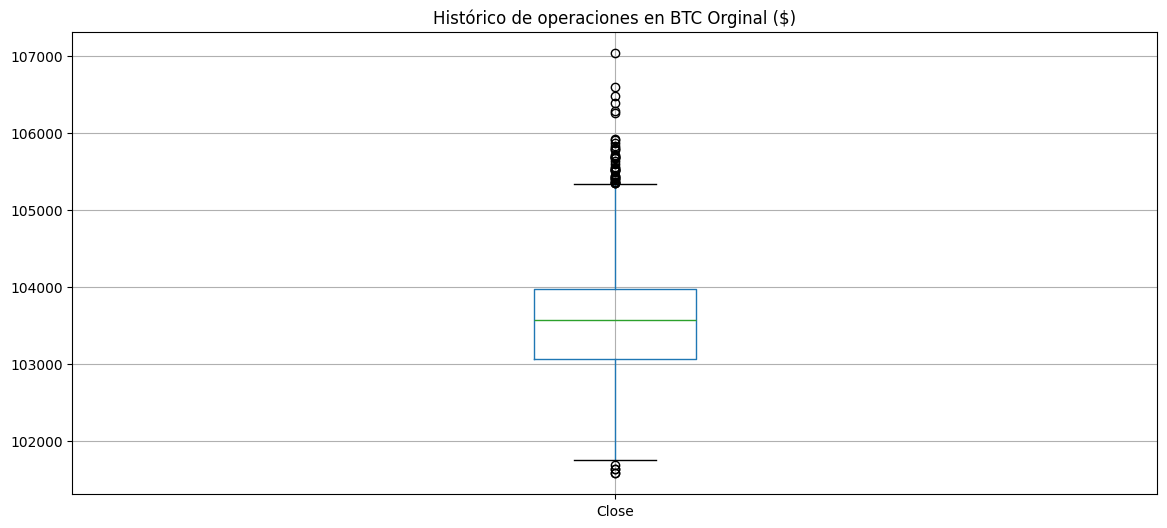

In [ ]:
plt.rc('figure', figsize= (14,6))
print("Identificando Outliers en DataFrame original: ")
g1_origin = df_bitcoin_limpio.boxplot('Close')
g1_origin.set_title('Histórico de operaciones en BTC Orginal ($)')


In [ ]:
p_cierre= df_bitcoin_limpio['Close']
Q1 = p_cierre.quantile(0.25)
Q3 = p_cierre.quantile(0.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
seleccion=(p_cierre > limite_inferior) & (p_cierre < limite_superior)
df_bitcoin_limpio = df_bitcoin_limpio[seleccion]

In [ ]:
media_bitcoin = df_bitcoin_limpio['Close'].mean()
media_bitcoin

np.float64(103513.98439969704)

El promedio del precio de BTC: 103513.98439969704


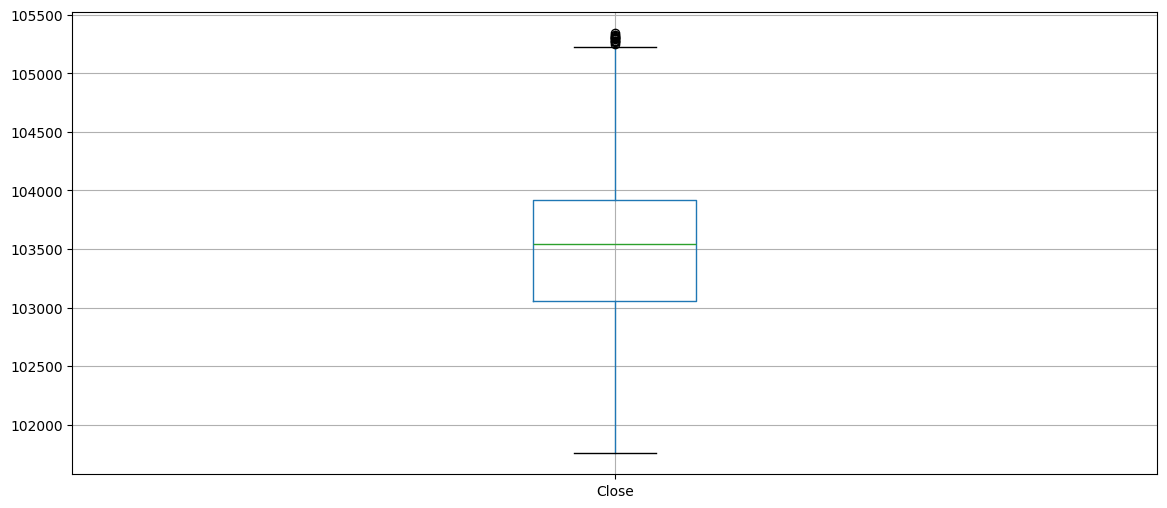

In [ ]:
limpieza_datos()
df_bitcoin_limpio.boxplot(['Close'])
print(f'El promedio del precio de BTC: {media_bitcoin}')

#4.-Tomar Decisiones


In [ ]:
def tomar_decision():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

In [ ]:
if precio_actual >= media_bitcoin and tendencia == 'Bear':
  algoritmo_decision = 'Venta'
elif precio_actual < media_bitcoin and tendencia == 'Bull':
  algoritmo_decision = 'Compra'
else:
  algoritmo_decision = 'Espera'
tomar_decision()

# Muestra la decisión tomada
print("Direccion a operar:", algoritmo_decision)
# Imprime las variables globales
print("Precio Actual:", precio_actual)
print("Tendencia Actual:", tendencia)
print("Precio medio de Bitcoin:", media_bitcoin)

Direccion a operar: Espera
Precio Actual: 105272.12
Tendencia Actual: Bull
Precio medio de Bitcoin: 103513.98439969704


#5.- Visualización

In [ ]:
def visualizacion():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

In [ ]:
  df_bitcoin['Promedio'] = media_bitcoin

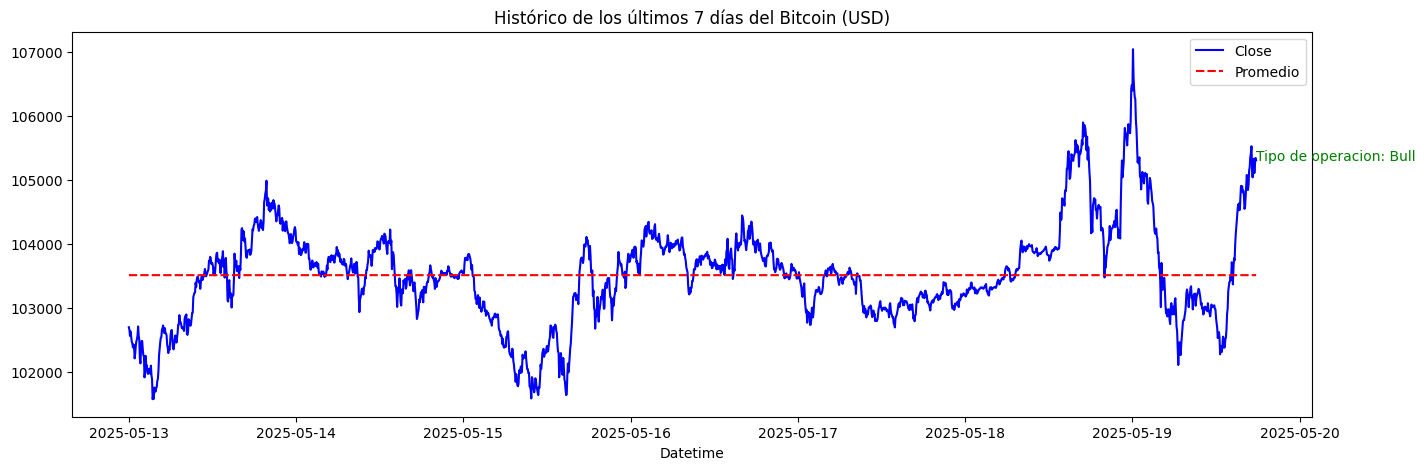

In [ ]:
color_legend = {
    'Bear' : 'Red',
    'Bull' : 'Green',
    'Espera' : 'Black'
}
plt.figure(figsize = (16, 5))
plt.title('Histórico de los últimos 7 días del Bitcoin (USD)')
sns.lineplot(data = df_bitcoin[['Close', 'Promedio']], palette = {'Close' : 'b', 'Promedio' : 'r'})
plt.annotate(f'Tipo de operacion: {tendencia}', (df_bitcoin.index.max(), float(df_bitcoin.tail(1).Close.iloc[0])), color = color_legend[tendencia])
plt.show()
visualizacion()

#6.-Automatización

In [ ]:
from IPython.display import clear_output
import time

In [ ]:
while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  tomar_decision()
  print("Precio Actual:", precio_actual)
  print("Tendencia:", tendencia)
  print("Media Bitcoin:", media_bitcoin)
  print("Algoritmo de Decisión:", algoritmo_decision)
  visualizacion()
  time.sleep(300)